# House Price Study Notebook

### Objectives

* The Client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualisations of the correlated variables against the sale price.

### Inputs

* 

### Outputs

* 
* 

### Additional Comments

* 
* 

---

## Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ames-heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory


* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ames-heritage-housing'

---

## Load Data

In [4]:
import pandas as pd
df_house_prices = pd.read_csv(f"outputs/datasets/collection/house_prices_records.csv")
df_house_prices.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

## Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean.
* Explore the data with pandas study

In [9]:
%pip uninstall pandas-profiling -y
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df_house_prices, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Findings

* The dataset has a majority of Numeric variables (Numeric 20, Text/Categorical 4)
* Statistical guidance suggests that bias is likely in analyses with more than 10% missingness. The percentage of missing data in this dataset is 9.8%.


## Correlation Study

* We are trying to identify if there are any correlations between the variables and the Sale Price of the house.
* We will use .corr() for spearman and pearson methods, and investigate the correlations against the SalePrice variable.
* The r values below is between -1 (negative) and 1 (positive) to determine the strength of the correlation.
* With these methods we will use SalePrice values to gather correlation values and sort them by absolute (abs) values.

#### Spearman Method:

* The Spearman correlation looks at the monotonic relationship between two variables. The method ranks the values of both variables and measures the difference between the two ranks.
* Using the correlation cooefficient we will be able to determine how strong the correlation is (between -1 and 1) and in which direction the correlation is going.
* We are looking for the top 10 most correlations.

In [17]:
salesprice_corr_spearman = df_house_prices.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
salesprice_corr_spearman 

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

#### Pearson Method:

* The Pearson correlation looks at the linear relationship between two variables and uses the raw data. We can measure how strong the correlation is and in which direction the correlation is going (positive, negative or no correlation).
* We are looking for the top 10 most correlations.

In [18]:
salesprice_corr_pearson = df_house_prices.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
salesprice_corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

The values are ranging between 0.3 and 0.8 which represents moderate to strong correlation levels.

We are now going to consider the top 5 correlation levels. We will convert these correlations into lists and concatenate.

In [19]:
top_n = 5
set(salesprice_corr_spearman[:top_n].index.to_list() + salesprice_corr_pearson[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Six variables were provided (this could be due to two variables having the same correlation levels). We are going to use these variables and investigate if:


* If the size of the First Floor in square feet increases the salesprice
* If the size of the GarageArea in square feet increases the salesprice
* If the size of the Ground Floor (above Grade Living Area) in square feet increases the salesprice
* If the overall material and finish of the house increases the salesprice
* If the total square feet of the basement area increases the salesprice
* If the age of the house increases the salesprice

In [20]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

## EDA on selected variables

Next we are going to show the selected variables above with SalePrice:

In [21]:
df_eda = df_house_prices.filter(vars_to_study + ['SalePrice'])
df_eda.head(5)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500
3,961,642,1717,7,756,1915,140000
4,1145,836,2198,8,1145,2000,250000


Now we are going to distribute it by SalesPrice:

# EDIT

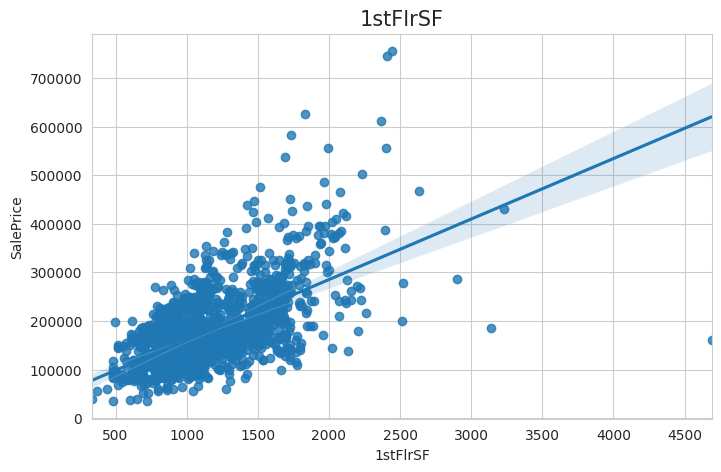

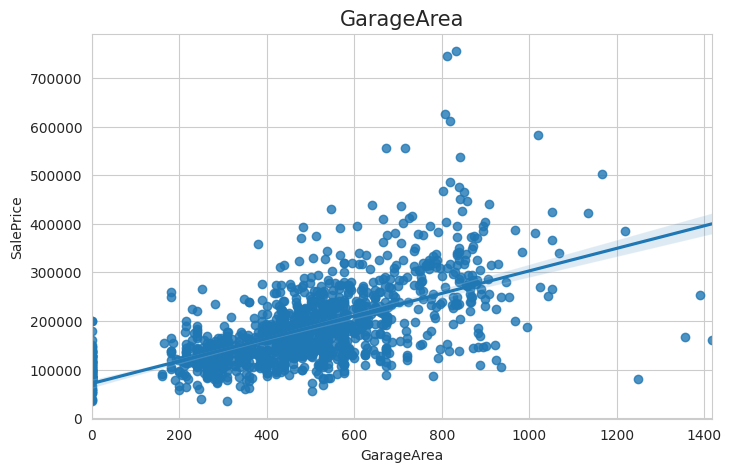

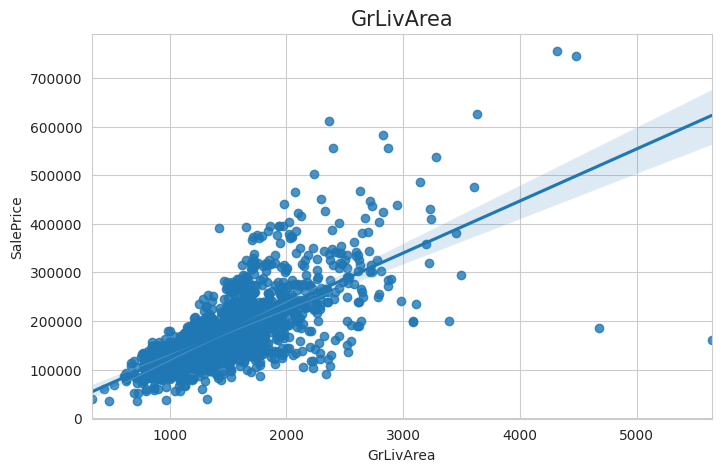

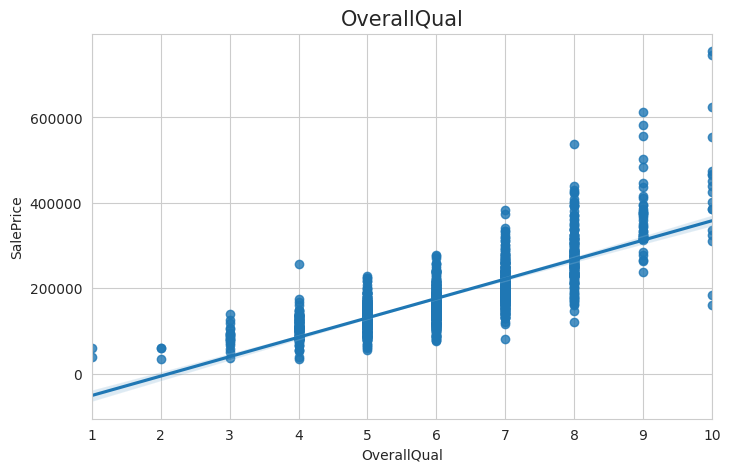

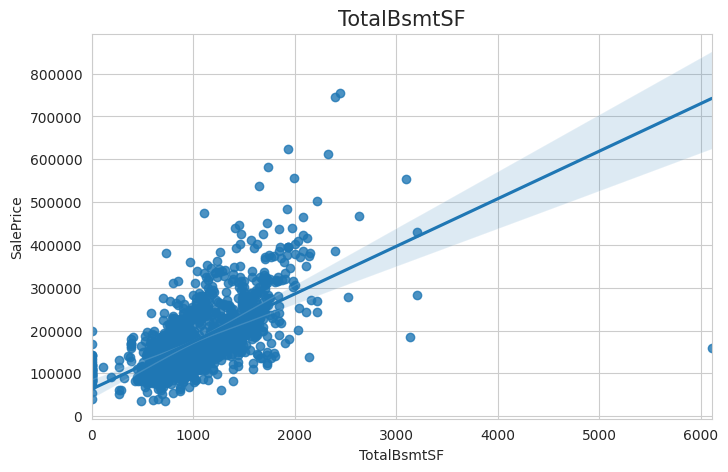

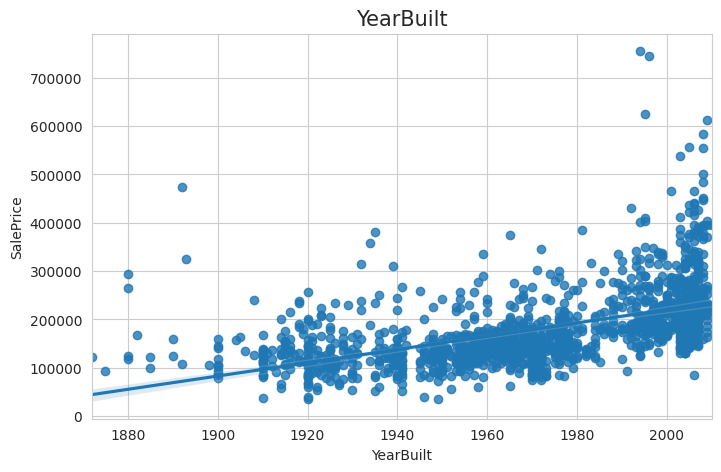

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_numerical(df_eda, col, target_var):

    plt.figure(figsize=(8,5))
    sns.regplot(data=df_eda, x=col, y=target_var)
    plt.title(f"{col}", fontsize=15)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

### Findings

* Correlation analysis of strong influence (gradient of lines)
* Correlations of Moderation influence (gradient of lines)

## Conclusions